In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Import Training data
Evals = {}

Names = ['Additive', 'Ini','IniLSTUR','Decoder','Encoder']

for name in Names:
    filestr = f'AllTransformerModels/EvaluationTranformer{name}.pkl'
    
    with open(filestr, 'rb') as f:
        Evals[name] = pickle.load(f)[0]


In [2]:
# Get End Scores for each model
EndScores = {'AUC':{}, 'MRR':{}, 'NDCG5':{}, 'NDCG10':{}} #'loss_vali':{}}

# Get AUC, MRR, NDCG5, NDCG10, loss_vali
for name in Names:
    print(name)
    # Get last value of each metric
    EndScores['AUC'][name] = Evals[name]['AUC'][-1]
    EndScores['MRR'][name] = Evals[name]['MRR'][-1]
    EndScores['NDCG5'][name] = Evals[name]['NDCG5'][-1]
    EndScores['NDCG10'][name] = Evals[name]['NDCG10'][-1]
    #EndScores['loss_vali'][name] = Evals[name]['loss_vali'][-1]
    # EndScores['AUC'][name] = max(Evals[name]['AUC'])
    # EndScores['MRR'][name] = max(Evals[name]['MRR'])
    # EndScores['NDCG5'][name] = max(Evals[name]['NDCG5'])
    # EndScores['NDCG10'][name] = max(Evals[name]['NDCG10'])

Additive
Ini
IniLSTUR
Decoder
Encoder


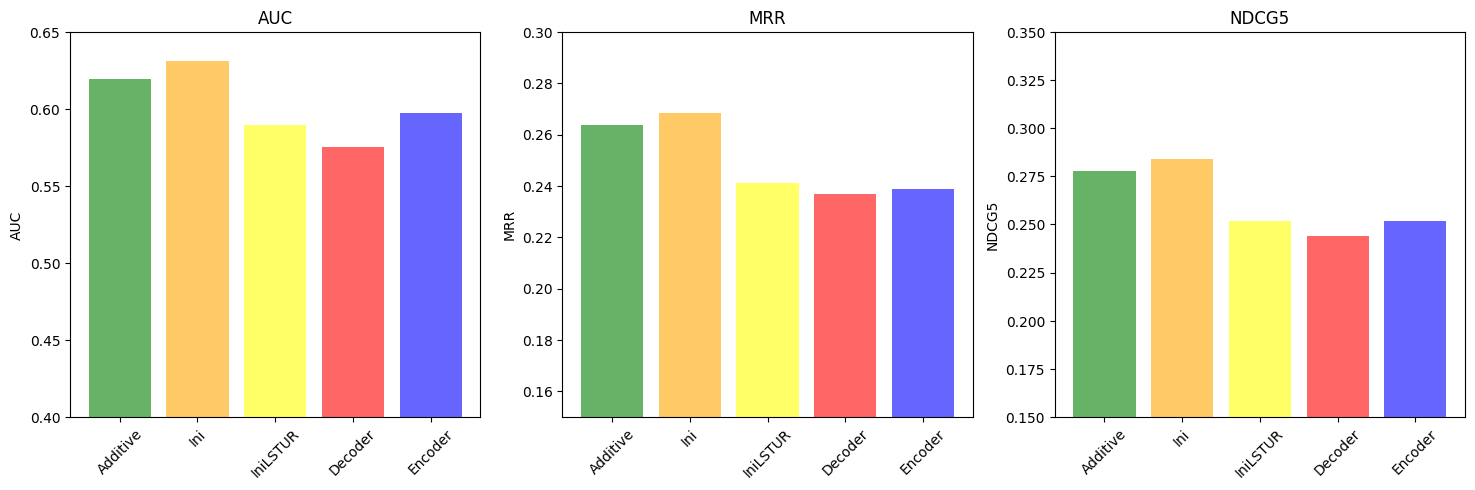

In [3]:
# Make a Bar plot of the scores

# Make a dataframe
df = pd.DataFrame(EndScores)

# Make a bar plot
fig, ax  = plt.subplots(1,3,figsize=(18,5))

Metrics = ['AUC', 'MRR', 'NDCG5'] #, 'NDCG10']
Intervals = [[0.4,0.65],[0.15,0.30],[0.15,0.35]] #,[0.20,0.40]]


for idx,(metric,interval) in enumerate(zip(Metrics,Intervals)):

    # Plot AUC
    ax[idx].bar(df.index, df[metric], label=metric, color= ['green', 'orange', 'yellow', 'red', 'blue', 'purple', 'black'])

    # set alpha value to 0.5 for all bars
    for i in range(len(df)):
        ax[idx].get_children()[i].set_alpha(0.6)

    # Angle the x-ticks
    ax[idx].tick_params(axis='x', rotation=45)

    # Set the y-axis limits
    ax[idx].set_ylim(interval)

    # Set the subtitle
    ax[idx].set_title(metric)

    # Set the y-axis label
    ax[idx].set_ylabel(metric)






In [5]:
df

,AUC,MRR,NDCG5,NDCG10
Additive,0.6193,0.2639,0.2776,0.3403
Ini,0.6313,0.2685,0.2840,0.3461
IniLSTUR,0.5895,0.2412,0.2516,0.3124
Decoder,0.5754,0.2370,0.2440,0.3025
Encoder,0.5973,0.2390,0.2519,0.3127


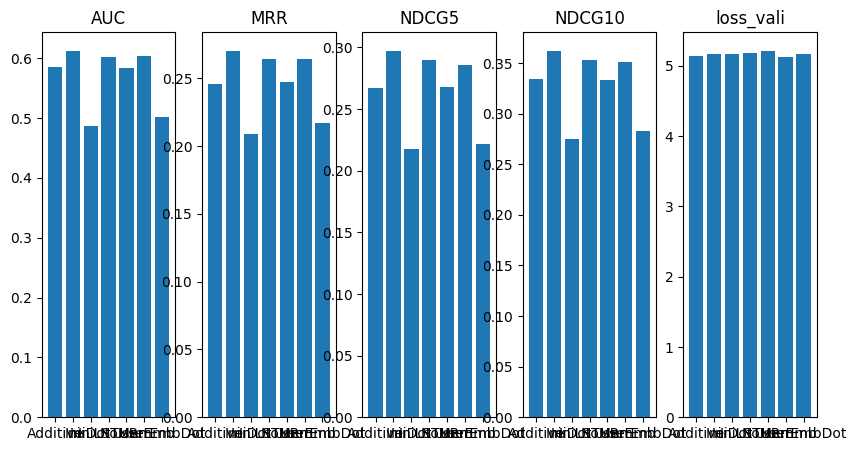

In [24]:
# Make a Bar plot for each metric comparing the models

# Make subplots
fig, ax = plt.subplots(1,5,figsize=(10,5))

# AUC
ax[0].bar(EndScores['AUC'].keys(),EndScores['AUC'].values())
ax[0].set_title('AUC')

# MRR
ax[1].bar(EndScores['MRR'].keys(),EndScores['MRR'].values())
ax[1].set_title('MRR')

# NDCG5
ax[2].bar(EndScores['NDCG5'].keys(),EndScores['NDCG5'].values())
ax[2].set_title('NDCG5')

# NDCG10
ax[3].bar(EndScores['NDCG10'].keys(),EndScores['NDCG10'].values())
ax[3].set_title('NDCG10')

# loss_vali

ax[4].bar(EndScores['loss_vali'].keys(),EndScores['loss_vali'].values())
ax[4].set_title('loss_vali')

plt.show()


